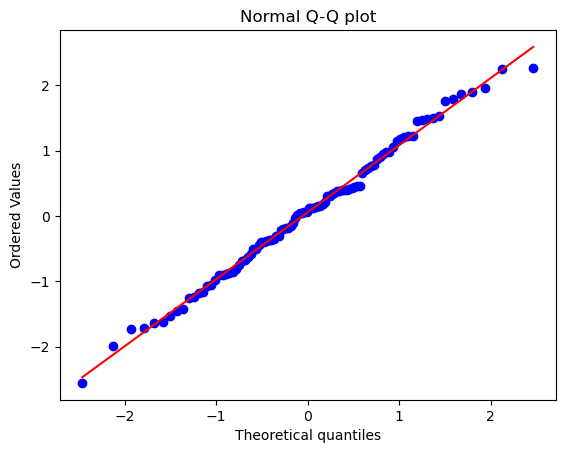

(array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
       -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
       -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
       -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
       -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
       -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
       -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
       -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
       -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
       -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
        0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
        0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
        0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
        0.39732558,  0.42450149,  0.45199463,  0.47983378,  0.5

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate example data
np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=100)

# Create Q-Q plot
a,b=stats.probplot(data, dist="norm", plot=plt)

plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

print(a,b)

In [2]:
import numpy as np

# Example list
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Percentiles
percentiles = [100, 99.5, 97.5, 90, 75, 50, 25, 10, 2.5, 0.5, 0]

# Calculate quantiles
quantiles = np.quantile(data,[i/100 for i in percentiles])

# Print results
for p, q in zip(percentiles, quantiles):
    print(f"{p}th percentile: {q}")
    
######## NOT same to JMP!


100th percentile: 10.0
99.5th percentile: 9.955
97.5th percentile: 9.775
90th percentile: 9.1
75th percentile: 7.75
50th percentile: 5.5
25th percentile: 3.25
10th percentile: 1.9
2.5th percentile: 1.225
0.5th percentile: 1.045
0th percentile: 1.0


In [13]:
import statistics

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print("25th percentile:", statistics.quantiles(data, n=1000)[0])
print("50th percentile (median):", statistics.median(data))
print("75th percentile:", statistics.quantiles(data, n=1000)[2])

######## NOT same to JMP!


25th percentile: 0.011
50th percentile (median): 5.5
75th percentile: 0.033


In [3]:
########## Result same to JMP  ##################

def quantiles(input_data,
              percentiles = [100, 99.5, 97.5, 90, 75, 50, 
                             25, 10, 2.5, 0.5, 0]):
    
    data=sorted([i for i in input_data])
    N=len(data)
    # x input is percentile
    p=lambda x:(N+1)*x/100
    
    def value(i):
        if i<=1:
            return data[0]
        if i>=N:
            return data[-1]
        a1=data[int(i)-1]
        a2=data[int(i)]
        dec=i-int(i)
        return a1+(a2-a1)*dec
    
    res=[]
    for i in percentiles:
        res.append(value(p(i)))
    return res
    ########## Result same to JMP  ##################
quantiles([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

[10, 10, 10, 9.9, 8.25, 5.5, 2.75, 1.1, 1, 1, 1]

In [4]:
data = [18.5, 21.2, 19.4, 16.5, 17.9, 19.0, 20.3, 21.2, 19.6, 19.8, 20.4, 20.5, 
          22.2, 21.5, 20.8, 20.3, 19.1, 20.6, 20.8, 21.6, 22.8, 22.2, 23.2, 23.0, 
          19.0, 20.5, 20.3, 19.2, 20.7, 21.0, 20.5, 19.1]

quantiles(data)

[23.2, 23.2, 23.2, 22.62, 21.2, 20.5, 19.25, 18.65, 16.5, 16.5, 16.5]

In [5]:
from scipy.stats import norm

u,s=norm.fit(data)

print(u,s)

20.396875 1.451827377608991


In [6]:
from scipy.stats import shapiro
from scipy.stats import anderson
print(shapiro(data),anderson(data))
# Shapiro P value is same to JMP, Anderson dosn't have one

ShapiroResult(statistic=0.9754997491836548, pvalue=0.6623572707176208) AndersonResult(statistic=0.31178790623822294, critical_values=array([0.523, 0.596, 0.715, 0.834, 0.992]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=20.396875, scale=1.4750580907095632)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [11]:
s=shapiro(np.array(data))
print(s)

ShapiroResult(statistic=0.9754997491836548, pvalue=0.6623572707176208)


In [10]:
import numpy as np
from statsmodels.stats.diagnostic import normal_ad


# Perform Anderson-Darling test
statistic, p_value = normal_ad(np.array(data))

print(f"Anderson-Darling statistic: {statistic}")
print(f"p-value: {p_value}")

# This calculation is same to minitabe express


(0.31178790623822294, 0.5332248653089934)
Anderson-Darling statistic: 0.31178790623822294
p-value: 0.5332248653089934


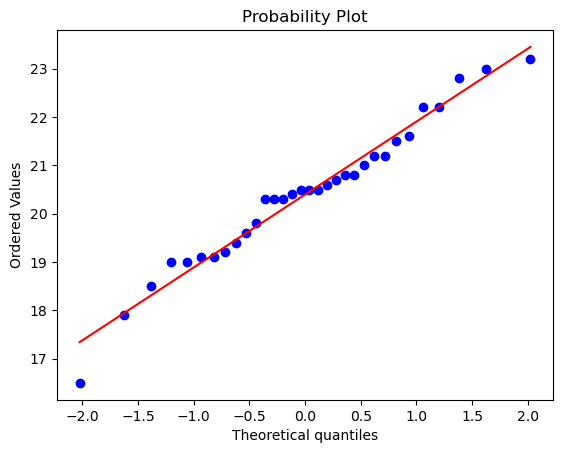

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


# Create Q-Q plot
a,b=stats.probplot(data, dist="norm", plot=plt)

In [29]:
a,b

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([16.5, 17.9, 18.5, 19. , 19. , 19.1, 19.1, 19.2, 19.4, 19.6, 19.8,
         20.3, 20.3, 20.3, 20.4, 20.5, 20.5, 20.5, 20.6, 20.7, 20.8, 20.8,
         21. , 21.2, 21.2, 21.5, 21.6, 22.2, 22.2, 22.8, 23. , 23.2])),
 (1.5082310428731083, 20.396875, 0.9856269427573182))